# Multiband Periodograms with ``gatspy``

``gatspy`` includes an implementation of the multiband periodogram, introduced in [VanderPlas & Ivezic 2015](http://jakevdp.github.io/multiband_LS/). If you've taken a look at the [Single Band Example](SingleBand.ipynb), the interface should be pretty familiar.

As in that example, let's start with some imports, and downloading some of the Sesear 2010 Stripe 82 RR Lyrae data, and plotting it:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn's default plotting styles for matplotlib
import seaborn; seaborn.set()

In [2]:
from gatspy.datasets import fetch_rrlyrae
rrlyrae = fetch_rrlyrae()
lcid = rrlyrae.ids[0]

In [3]:
t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
period = rrlyrae.get_metadata(lcid)['P']

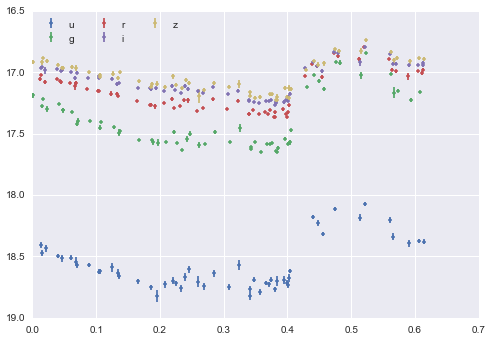

In [4]:
for filt in 'ugriz':
    mask = (filts == filt)
    plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt='.', label=filt)
plt.gca().invert_yaxis()
plt.legend(ncol=3, loc='upper left');

Now we'll fit the multiband periodogram model to this data. For more information on the model, refer to the [VanderPlas and Ivezic paper](http://jakevdp.github.io/multiband_LS/) mentioned above.

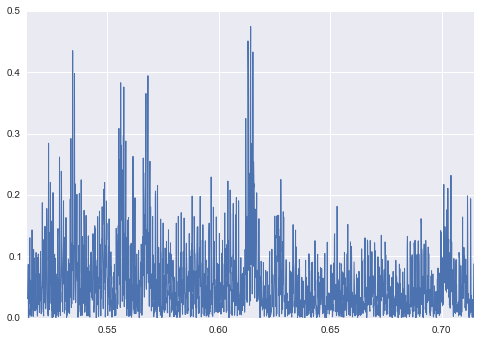

In [5]:
from gatspy.periodic import LombScargleMultiband
model = LombScargleMultiband(Nterms_base=1, Nterms_band=0)
model.fit(t, y, dy, filts)
periods = np.linspace(period - 0.1, period + 0.1, 2000)
power = model.periodogram(periods)
plt.plot(periods, power, lw=1)
plt.xlim(periods[0], periods[-1]);

We can see what the multiterm model looks like by plotting it over the data:

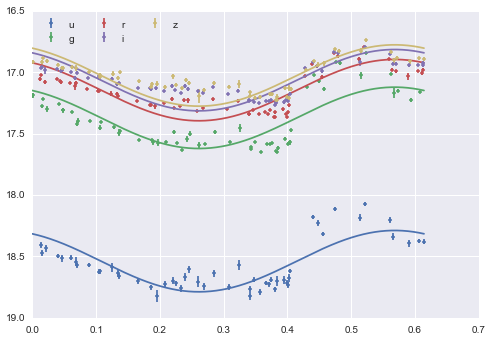

In [6]:
def plot_model(model, lcid):
    t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
    model.fit(t, y, dy, filts)
    
    tfit = np.linspace(0, period, 1000)
    for filt in 'ugriz':
        mask = (filts == filt)
        eb = plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt='.', label=filt)
        yfit = model.predict(tfit, filt, period=period)
        plt.plot(tfit, yfit, color=eb[0].get_color())
    plt.gca().invert_yaxis()
    plt.legend(ncol=3, loc='upper left')
    
plot_model(LombScargleMultiband(Nterms_base=1, Nterms_band=0), lcid)

If we'd like to do a higher-oder multiterm model, we can simply adjust the number of terms in the base and band models:

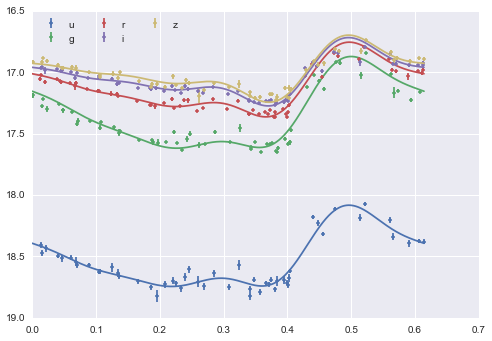

In [7]:
plot_model(LombScargleMultiband(Nterms_base=4, Nterms_band=1), lcid)

The periodogram can also be computed for any model using the same interface as above.
For more information and anlysis of this algorithm, see [our paper](http://jakevdp.github.io/multiband_LS)